In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import random
import glob
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, MobileNet
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, f1_score

In [ ]:
def split_dataset(source_dir, output_dir, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    for category in ['benign', 'malignant']:
        x=0
        category_path = os.path.join(source_dir, category,"SOB")
        for tissue in os.listdir(category_path):
            tissue_path = os.path.join(category_path, tissue)
            for sobs in os.listdir(tissue_path):
                sob_path = os.path.join(tissue_path, sobs)
                for magnification in os.listdir(sob_path):
                    magnification_path = os.path.join(sob_path, magnification)
                    images = os.listdir(magnification_path)
                    random.shuffle(images)
                    train_count = int(len(images) * train_ratio)
                    val_count = int(len(images) * val_ratio)
                    for split, count in zip(
                        ['train', 'val', 'test'],
                        [train_count, val_count, len(images) - train_count - val_count]
                    ):
                        split_dir = os.path.join(output_dir, split,category)
                        os.makedirs(split_dir, exist_ok=True)

                        for img in images[:count]:
                            if img not in glob.glob(split_dir):
                                shutil.copy(os.path.join(magnification_path, img), split_dir)
                        images = images[count:]
split_dataset(r'"C:\Users\Killerhunks\OneDrive\Desktop\test\CNN model\BreaKHis_v1\histology_slides\breast', '"C:\Users\Killerhunks\OneDrive\Desktop\test\CNN model\BreaKHis_v1\histology_slides\breast')


In [ ]:
# Data Augmentation and Normalization
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)
# Loading datasets
train_data = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Killerhunks\OneDrive\Desktop\test\CNN model\BreaKHis_v1\histology_slides\breast\train",
    image_size=(224, 224),
    batch_size=32
)

val_data = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Killerhunks\OneDrive\Desktop\test\CNN model\BreaKHis_v1\histology_slides\breast\val",
    image_size=(224, 224),
    batch_size=32
)

test_data = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Killerhunks\OneDrive\Desktop\test\CNN model\BreaKHis_v1\histology_slides\breast\test",
    image_size=(224, 224),
    batch_size=32
)

Found 7481 files belonging to 2 classes.
Found 3465 files belonging to 2 classes.
Found 2760 files belonging to 2 classes.


In [ ]:
# Defining CNN Model, and
cnn_model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'],)

# Training Model
history = cnn_model.fit(train_data, validation_data=val_data, epochs=10)

y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred_probs = cnn_model.predict(test_data)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

#printing the accuracy, roc, f1 score
print(classification_report(y_true, y_pred_classes, target_names=['Benign', 'Malignant']))

roc_auc = roc_auc_score(y_true, y_pred_probs)
print(f"ROC AUC Score: {roc_auc}")

f1 = f1_score(y_true, y_pred_classes)
print(f"F1 Score: {f1}")

Epoch 1/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 158s 672ms/step - accuracy: 0.6388 - loss: 58.9488 - val_accuracy: 0.6398 - val_loss: 0.6426
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 153s 655ms/step - accuracy: 0.6769 - loss: 0.6393 - val_accuracy: 0.6115 - val_loss: 0.6749
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 157s 669ms/step - accuracy: 0.6682 - loss: 0.6363 - val_accuracy: 0.6121 - val_loss: 0.6730
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 156s 665ms/step - accuracy: 0.6664 - loss: 0.6354 - val_accuracy: 0.6121 - val_loss: 0.6712
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 154s 657ms/step - accuracy: 0.6658 - loss: 0.6313 - val_accuracy: 0.6115 - val_loss: 0.6765
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 153s 655ms/step - accuracy: 0.6658 - loss: 0.6385 - val_accuracy: 0.6115 - val_loss: 0.6766
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 153s 653ms/step - accuracy: 0.6651 - loss: 0.6377 - val_accuracy: 0.6115 - val_loss: 0.6757
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 153s 653ms/step - accuracy: 0.6666 

c:\Users\Garv2\OneDrive\Desktop\test\CNN model\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Garv2\OneDrive\Desktop\test\CNN model\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Garv2\OneDrive\Desktop\test\CNN model\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [15]:
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
#using pretrained models
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet_model.layers:
    layer.trainable = False

x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=resnet_model.input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)

test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━  304s 1s/step - accuracy: 0.7515 - loss: 0.5472 - val_accuracy: 0.8790 - val_loss: 0.3008
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.8699 - loss: 0.3122 - val_accuracy: 0.8922 - val_loss: 0.2616
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.8881 - loss: 0.2667 - val_accuracy: 0.9244 - val_loss: 0.2002
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 683s 3s/step - accuracy: 0.9151 - loss: 0.2208 - val_accuracy: 0.9363 - val_loss: 0.1816
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.9184 - loss: 0.1988 - val_accuracy: 0.9411 - val_loss: 0.1600
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 553s 3s/step - accuracy: 0.9242 - loss: 0.1832 - val_accuracy: 0.9522 - val_loss: 0.1382
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 914s 4s/step - accuracy: 0.9373 - loss: 0.1625 - val_accuracy: 0.9566 - val_loss: 0.1243
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 747s 4s/step - accuracy: 0.9462 - loss: 0.1367 - val_acc

In [ ]:
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = mobilenet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=mobilenet_model.input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)

test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.8290 - loss: 0.4071 - val_accuracy: 0.6518 - val_loss: 2.0597
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.9312 - loss: 0.1741 - val_accuracy: 0.9475 - val_loss: 0.1341
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.9562 - loss: 0.1391 - val_accuracy: 0.9148 - val_loss: 0.2392
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.9614 - loss: 0.1142 - val_accuracy: 0.8492 - val_loss: 0.4799
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 400s 2s/step - accuracy: 0.9711 - loss: 0.0872 - val_accuracy: 0.9594 - val_loss: 0.1193
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.9701 - loss: 0.0923 - val_accuracy: 0.9415 - val_loss: 0.2410
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.9809 - loss: 0.0530 - val_accuracy: 0.9570 - val_loss: 0.1425
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.9722 - loss: 0.0713 - val_accu

In [ ]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=vgg16_model.input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)

test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 72s 1us/step
Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1808s 9s/step - accuracy: 0.5970 - loss: 6.3175 - val_accuracy: 0.5595 - val_loss: 0.6897
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1790s 9s/step - accuracy: 0.6361 - loss: 0.6576 - val_accuracy: 0.5595 - val_loss: 0.6975
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1766s 9s/step - accuracy: 0.6346 - loss: 0.6568 - val_accuracy: 0.5595 - val_loss: 0.6986
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2218s 11s/step - accuracy: 0.6361 - loss: 0.6569 - val_accuracy: 0.5595 - val_loss: 0.6992
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1836s 9s/step - accuracy: 0.6373 - loss: 0.6549 - val_accuracy: 0.5595 - val_loss: 0.6996
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1851s 9s/step - accuracy: 0.6403 - loss: 0.6552 - val_accuracy: 0.5595 - val_loss: 0.6987
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1844s 9s/step - accuracy: 0.6343 - loss: 0.6571 - val_accuracy: 0.5595 - val_loss: 0.6990
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━

In [ ]:
from transformers import ViTFeatureExtractor, TFViTForImageClassification, TFAutoModelForImageClassification

c:\Users\Garv2\OneDrive\Desktop\test\CNN model\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#  Define dataset paths
dataset_dir = r"C:\Users\Killerhunks\OneDrive\Desktop\test\CNN model\BreaKHis_v1\histology_slides\breast"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

#  Load and prepare data using TensorFlow ImageDataGenerator
def load_data(data_dir, img_size, batch_size):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        zoom_range=0.2,
        fill_mode='nearest'
    )
    
    dataset = datagen.flow_from_directory(
        data_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True
    )
    
    return dataset

#  Compute class weights
def get_class_weights(train_data):
    class_labels = np.unique(train_data.classes)  # Ensure classes are NumPy array
    class_weights = compute_class_weight(class_weight="balanced", classes=class_labels, y=train_data.classes)
    return dict(zip(class_labels, class_weights))

In [ ]:
#  Define Custom Focal Loss to Handle Imbalance
import tensorflow.keras.backend as K

def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        bce = K.binary_crossentropy(y_true, y_pred)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        focal_factor = alpha * K.pow((1 - p_t), gamma)
        return focal_factor * bce
    return loss

#  Create a Fine-Tuned EfficientNet Model
def create_vit_model(num_classes=2, input_shape=(224, 224, 3)):
    base_model = tf.keras.applications.EfficientNetB0(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    
    # Unfreeze some layers for fine-tuning
    for layer in base_model.layers[-50:]:  # Unfreeze last 50 layers
        layer.trainable = True

    # Create a custom classification head
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    #  Cosine Learning Rate Decay
    lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=1e-4, decay_steps=1000, alpha=0.01
    )
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=lr_schedule),
        loss=focal_loss(alpha=0.25, gamma=2.0),
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )
    
    return model

#  Train the Model with Callbacks
def train_model(model, train_data, val_data, class_weights, epochs=15):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
    ]
    
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=callbacks
    )
    
    return history, model


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
#  Evaluate model performance
def evaluate_model(model, test_data):
    y_true = test_data.classes
    steps = test_data.samples // test_data.batch_size + 1
    y_pred_probs = model.predict(test_data, steps=steps)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()
    
    print("Classification Report:\n", classification_report(y_true, y_pred))
    try:
        print("ROC-AUC Score:", roc_auc_score(y_true, y_pred_probs))
    except:
        print("Could not compute ROC-AUC Score")
    print("F1 Score:", f1_score(y_true, y_pred))

#  Save the model
def save_model(model, filepath):
    model.save(filepath)
    print(f"Model saved to {filepath}")

#  Execute the Pipeline
if __name__ == "__main__":
    IMG_SIZE = 224
    BATCH_SIZE = 32
    EPOCHS = 20

    # Load data
    print("Loading datasets...")
    train_data = load_data(train_dir, IMG_SIZE, BATCH_SIZE)
    val_data = load_data(val_dir, IMG_SIZE, BATCH_SIZE)
    test_data = load_data(test_dir, IMG_SIZE, BATCH_SIZE)

    # Compute class weights
    class_weights = get_class_weights(train_data)
    print("Class Weights:", class_weights)

    # Create model
    print("Creating model...")
    model = create_vit_model()

    # Train model
    print("Training model...")
    history, trained_model = train_model(model, train_data, val_data, class_weights, epochs=EPOCHS)

    # Evaluate mode

Loading datasets...
Found 6620 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Found 1941 images belonging to 2 classes.
Class Weights: {np.int32(0): np.float64(1.3808927826449728), np.int32(1): np.float64(0.7838029836609046)}
Creating model...
Training model...


c:\Users\Garv2\OneDrive\Desktop\test\CNN model\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 599s 3s/step - accuracy: 0.6396 - auc: 0.7235 - loss: 0.0981 - val_accuracy: 0.5802 - val_auc: 0.5743 - val_loss: 0.0428 - learning_rate: 8.9897e-05
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 563s 3s/step - accuracy: 0.8061 - auc: 0.8918 - loss: 0.0482 - val_accuracy: 0.5961 - val_auc: 0.5621 - val_loss: 0.0526 - learning_rate: 6.3712e-05
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 563s 3s/step - accuracy: 0.8504 - auc: 0.9272 - loss: 0.0352 - val_accuracy: 0.4564 - val_auc: 0.6238 - val_loss: 0.1416 - learning_rate: 3.2133e-05
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 560s 3s/step - accuracy: 0.8646 - auc: 0.9384 - loss: 0.0308 - val_accuracy: 0.7704 - val_auc: 0.9284 - val_loss: 0.0408 - learning_rate: 8.0524e-06
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 554s 3s/step - accuracy: 0.8581 - auc: 0.9434 - loss: 0.0289 - val_accuracy: 0.9117 - val_auc: 0.9740 - val_loss: 0.0180 - learning_rate: 1.0000e-06
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 555s 3s/step - 

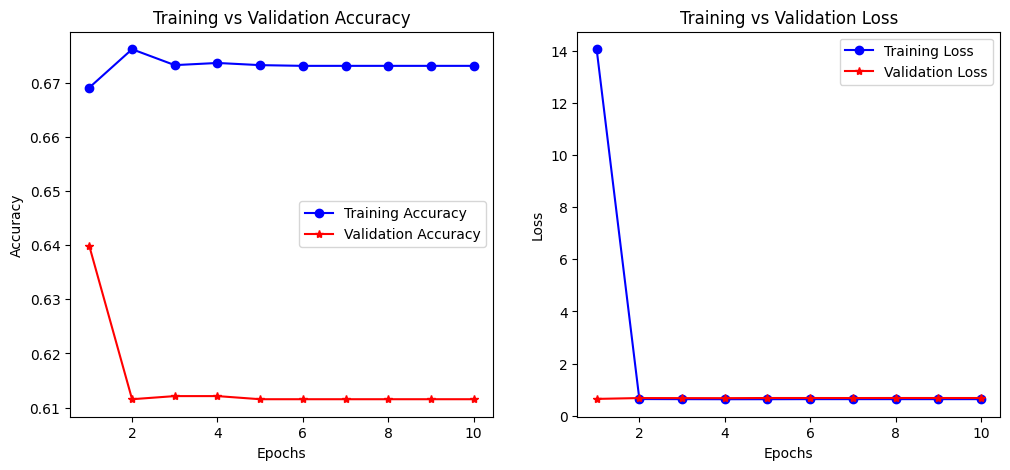

In [18]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Extract accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    
    plt.show()

# Call function to plot the graphs
plot_training_history(history)


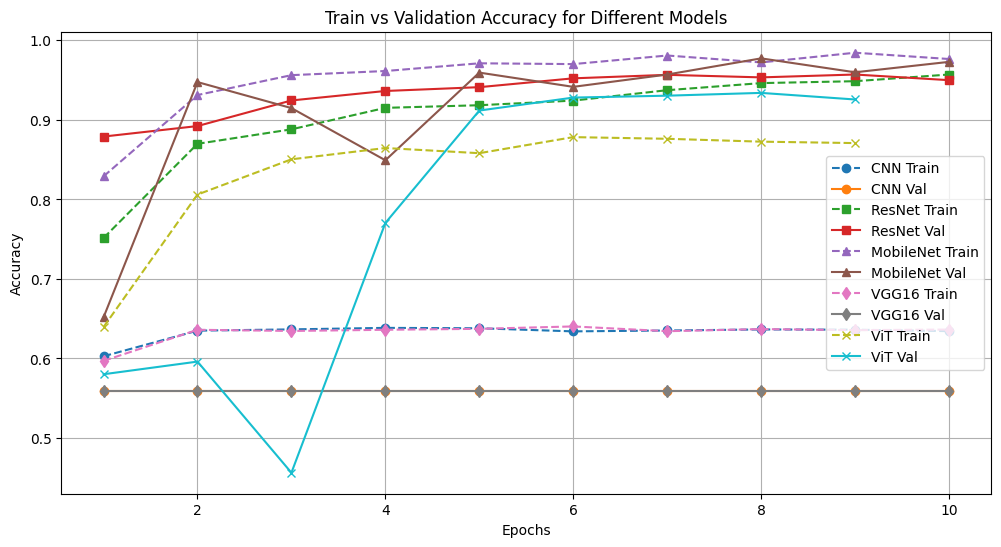

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have history objects from model training
models = {
    "CNN": cnn_history,
    "ResNet50": resnet_history,
    "MobileNet": mobilenet_history,
    "VGG16": vgg16_history,
    "ViT": vit_history
}

plt.figure(figsize=(10, 5))

for model_name, history in models.items():
    epochs = range(1, len(history.history["accuracy"]) + 1)
    plt.plot(epochs, history.history["accuracy"], marker="o", label=f"{model_name} Accuracy")
    plt.plot(epochs, history.history["val_accuracy"], linestyle="dashed", label=f"{model_name} Val Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.grid()
plt.show()


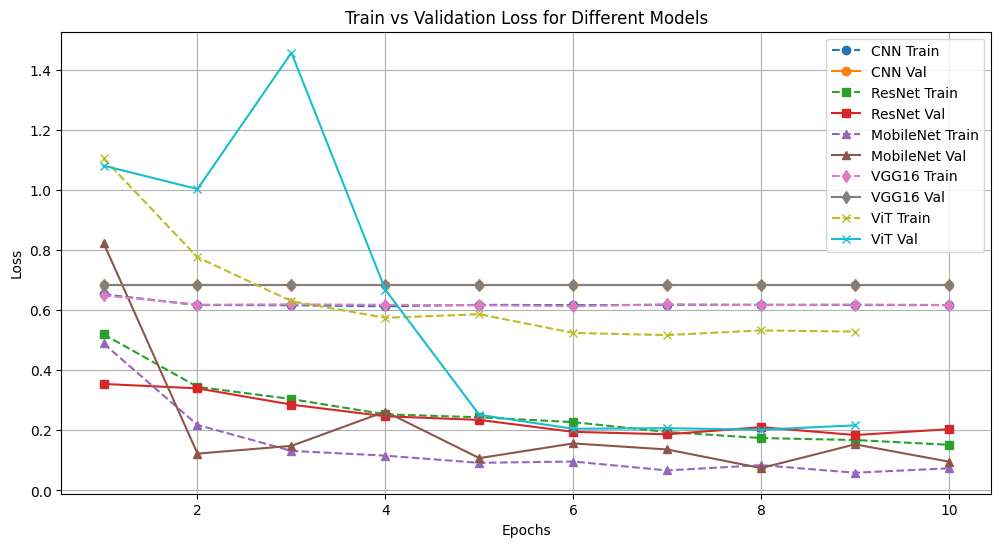

In [ ]:
plt.figure(figsize=(10, 5))

for model_name, history in models.items():
    epochs = range(1, len(history.history["loss"]) + 1)
    plt.plot(epochs, history.history["loss"], marker="o", label=f"{model_name} Loss")
    plt.plot(epochs, history.history["val_loss"], linestyle="dashed", label=f"{model_name} Val Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Comparison")
plt.legend()
plt.grid()
plt.show()